In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
from fastai.vision import *

In [22]:
import pandas as pd
from tqdm import tqdm
from scipy.special import logsumexp
from matplotlib import pyplot as plt

In [3]:
bs = 1
res = 128

In [4]:
path = "C:/Users/shaoa/conda_env_tensorflow/AdvancedEAST-master-borderloss/char_imgs_cleaned2/char_imgs_cleaned_case_sensitive"
test_path = "D:/RRC2019_ReCTS/ReCTS_test_part1/ReCTS_test_part1/Task1/img"

In [5]:
src = ImageList.from_folder(path).split_by_rand_pct(0.1, seed=430)

In [7]:
test = ImageList.from_folder(test_path).split_none()

In [8]:
tfms = get_transforms(max_rotate=20,  do_flip=False, max_zoom=1.05, p_affine=0.5, xtra_tfms=[cutout(length=(res//4, res//3), p=0.5)])

In [6]:
src

ItemLists;

Train: ImageList (434697 items)
Image (3, 44, 33),Image (3, 20, 15),Image (3, 69, 50),Image (3, 25, 16),Image (3, 18, 11)
Path: C:\Users\shaoa\conda_env_tensorflow\AdvancedEAST-master-borderloss\char_imgs_cleaned2\char_imgs_cleaned_case_sensitive;

Valid: ImageList (48299 items)
Image (3, 41, 34),Image (3, 19, 12),Image (3, 14, 17),Image (3, 42, 73),Image (3, 25, 24)
Path: C:\Users\shaoa\conda_env_tensorflow\AdvancedEAST-master-borderloss\char_imgs_cleaned2\char_imgs_cleaned_case_sensitive;

Test: None

In [11]:
def get_data(data, size, bs, padding_mode='zeros'):
    return (data.label_from_folder()
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [12]:
data = get_data(src, res, bs, 'zeros')

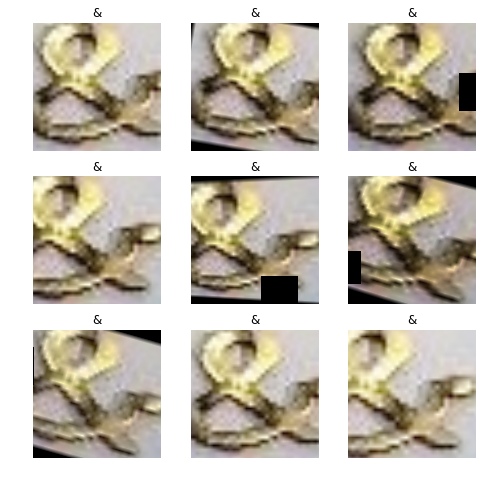

In [13]:
def _plot(i,j,ax):
    x,y = data.train_ds[2]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

# Inference

In [14]:
test_tfms = get_transforms(max_rotate=0, max_lighting=0, max_warp=0, p_lighting=0,  do_flip=False, max_zoom=1., p_affine=0)

In [15]:
def get_test_data(data, size, bs, padding_mode='zeros'):
    return (data.label_from_folder()
           .transform(None, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [16]:
test_data = get_test_data(test, res, bs, 'zeros')

In [8]:
test_data2 = get_test_data(test2, res, bs, 'zeros')

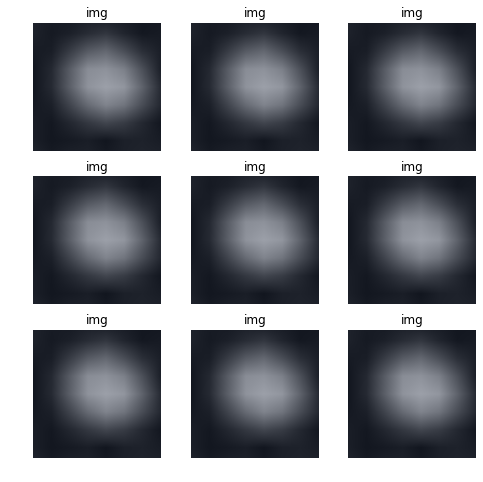

In [17]:
def _plot_test(i,j,ax):
    x,y = test_data.train_ds[9600]
    x.show(ax, y=y)

plot_multi(_plot_test, 3, 3, figsize=(8,8))

In [18]:
#gc.collect()
#learn = cnn_learner(data, models.resnet50, metrics=[error_rate], loss_func=LabelSmoothingCrossEntropy())
#learn.unfreeze()
#
#learn.model_dir = "./fastai_model"

In [19]:
#learn.load('stage-4_largeCutout128_task2_nonchar_0428')

Learner(data=ImageDataBunch;

Train: LabelList (622663 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
&,&,&,&,&
Path: C:\Users\shaoa\conda_env_tensorflow\AdvancedEAST-master-borderloss\char_imgs_all_cleaned;

Valid: LabelList (69184 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
2,茶,敬,排,米
Path: C:\Users\shaoa\conda_env_tensorflow\AdvancedEAST-master-borderloss\char_imgs_all_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(

In [ ]:
#learn.export("./fastai_model/stage-4_largeCutout128_task2_nonchar_0428_export.pkl")

In [21]:
learn = load_learner("./fastai_model/", "stage-4_largeCutout128_task2_nonchar_0430_export.pkl")

## Random task2 prediction result

In [25]:
def numpy_softmax(x):
    return np.exp(x - logsumexp(x, axis=0))
    #return np.exp(x)/np.sum(np.exp(x))

idx 22145


((Category 2,
  tensor(3),
  tensor([-21.0434, -19.9625, -19.7167,  ..., -21.1712, -21.5213, -20.3476])),
 0.88026273)

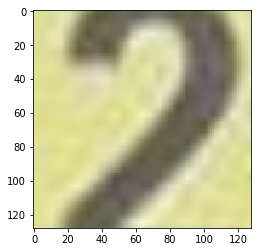

In [69]:
rand_idx = np.random.randint(len(test_data.train_ds))
print("idx", rand_idx)
test_im = test_data.train_ds[rand_idx][0]
plt.imshow((np.array(test_im.data)*255).astype(np.uint8).transpose(1,2,0))
learn.predict(test_im), numpy_softmax(np.array(learn.predict(test_im)[-1])).max()

## Random task1 prediction result

idx 10388


(Category 安,
 tensor(356),
 tensor([26.8084, 26.6180, 27.4375,  ..., 29.3422, 29.0190, 28.6550]))

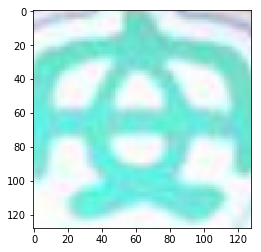

In [60]:
rand_idx = np.random.randint(len(test_data2.train_ds))
print("idx", rand_idx)
test_im = test_data2.train_ds[rand_idx][0]
plt.imshow((np.array(test_im.data)*255).astype(np.uint8).transpose(1,2,0))
learn.predict(test_im)

# Generate submission txt file

###### [Warning] Note the test image test_ReCTS_task2_000001.jpg should be renamed test_000001.jpg in the submission txt file.

# Task 1

In [31]:
task1_filenames = pd.read_csv("D:/RRC2019_ReCTS/submissions/Task1/filenames.csv").x

In [32]:
task1_filenames[:5]

0    test_ReCTS_task1_000001.jpg
1    test_ReCTS_task1_000002.jpg
2    test_ReCTS_task1_000003.jpg
3    test_ReCTS_task1_000004.jpg
4    test_ReCTS_task1_000005.jpg
Name: x, dtype: object

In [33]:
with open("D:/RRC2019_ReCTS/submissions/Task1/subm.txt", 'w', encoding="utf-8_sig") as task1_preds_txt:
    for i in tqdm(range(len(test_data2.train_ds))):
        filename = task1_filenames[i]
        subm_filename = filename.replace("ReCTS_task1_", "")
        test_im = test_data2.train_ds[i][0]
        pred = learn.predict(test_im)
        pred_char = str(pred[0])
        
        if pred_char[:6] == "upper_" or pred_char[:6] == "lower_":
            pred_char = pred_char[-1]
        
        task1_preds_txt.write(subm_filename + "," + pred_char + "\n")    

100%|████████████████████████████████████████████████████████████████████████████| 29335/29335 [20:39<00:00, 27.41it/s]


# Task 2

`intermediate_data/test2.csv` is the multiscale results of YOLOv3

In [72]:
def numpy_softmax(x):
    return np.exp(x - logsumexp(x, axis=0))
    #return np.exp(x)/np.sum(np.exp(x))

In [73]:
task2_filenames = pd.read_csv("D:/RRC2019_ReCTS/submissions/Task2/intermediate_data/test2.csv").x

In [74]:
task2_filenames[:5]

0    test_ReCTS_task2_000001\img\test_ReCTS_task2_0...
1    test_ReCTS_task2_000001\img\test_ReCTS_task2_0...
2    test_ReCTS_task2_000001\img\test_ReCTS_task2_0...
3    test_ReCTS_task2_000001\img\test_ReCTS_task2_0...
4    test_ReCTS_task2_000001\img\test_ReCTS_task2_0...
Name: x, dtype: object

In [75]:
str(task2_filenames[1])

'test_ReCTS_task2_000001\\img\\test_ReCTS_task2_000001_char_1.jpg'

In [76]:
preds_dict = {}
preds_dict2 = {}

In [77]:
for i in tqdm(range(len(test_data.train_ds))):
    filename = Path(task2_filenames[i]).stem
    img_idx = int(filename.split("test_ReCTS_task2_")[-1].split("_char_")[0])
    char_idx = int(filename.split("_char_")[-1].split(".jpg")[0])
    subm_filename = filename.replace("ReCTS_task2_", "").replace(f"_char_{str(char_idx)}", "")
    test_im = test_data.train_ds[i][0]
    pred = learn.predict(test_im)
    pred_char = str(pred[0])
    #print(pred_char, numpy_softmax(np.array(pred[-1])).max())
    
    if numpy_softmax(np.array(pred[-1])).max() <= 0.1:
        pred_char = ""
    #print(i, np.array(pred[-1]), numpy_softmax(np.array(pred[-1])).max())
    
    #print(filename, subm_filename, char_idx, pred_char)
    
    if pred_char == "quotation_mark":
        pred_char = "＇"
    elif pred_char == "colon":
        pred_char = "："
    elif pred_char == "dot":
        pred_char = "，"
    elif pred_char == "nonchar":
        pred_char = ""
    
    try:
        preds_dict[subm_filename][char_idx] = pred_char
    except:
        empty_pred_chars = ["" for _ in range(50)]
        preds_dict[subm_filename] = preds_dict.get(subm_filename, empty_pred_chars)
        preds_dict[subm_filename][char_idx] = pred_char

100%|████████████████████████████████████████████████████████████████████████████| 46015/46015 [21:49<00:00, 35.14it/s]


In [78]:
for fn in task2_filenames:
    key_raw_fn = Path(fn).stem.split("_char_")[0].replace("ReCTS_task2_", "")
    new_preds = []
    for char in preds_dict[key_raw_fn]:
        #print(char)
        if not (char == ""):
            new_preds.append(char)
    preds_dict[key_raw_fn] = new_preds
    #print(key_raw_fn, new_preds)

## Generate Task2 submission txt file

In [79]:
with open("D:/RRC2019_ReCTS/submissions/Task2/subm_nonchar_more_epochs_0430.txt", 'w', encoding="utf-8_sig") as task1_preds_txt:
    for k, v in preds_dict.items():
        task1_preds_txt.write(k+".jpg,")
        for char in v:
            task1_preds_txt.write(char)
        task1_preds_txt.write("\n")    